# Análise de dados - músicas do Spotify

## Definições

Descrição do dataset: Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .

### Features

* **song_name**: nome da música
* **song_popularity**: avaliação da música pelos usuários do Spotify
* **song_duration_ms**: duração da música em milesegundos
* **acousticness**: medida de confiança entre 0.0 e 1.0 que determina o quão acústica é a música, sendo 1 uma música uma alta confiaça da música ser acústica.
* **danceability**: baseado em um coeficiente é o quanto uma música é dançável, sendo 1 uma música altamente dançável e 0 nada dançável. 
* **energy**: percentual de intensidade de uma música. Varia entre 0.0 e 1.0
* **istrumentalness**: predição de se a música tem ou não vocais. Varia entre 0.0 e 1.0, sendo que quanto mais o valor se aproxima de 1.0, maior é a chance da música não conter vocais.
* **key**: valor estimado do tom da música. Baseado no [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class)
* **liveness**: detecta a presença de uma plateia no áudio. Varia entre 0.0 e 1.0, quanto maior seu índice, maior a probabilidade de haver uma plateia.
* **loudness**: o volume geral da música em decibéis(dB). Varia entre -60 e 0.
* **audio_mode**: indica se a música está em tom maior (1) ou menor(0)
* **speechiness**: detecta a presença de palavras faladas na música. Varia entre 0 e 1, sendo que quanto mais o valor se aproxima de 1.0, maior é a chance da música só ser falada
* **tempo**: o tempo medio estimado da música em batidas por minuto (BPM)
* **time_signature**: é a assinatura de tempo da música.
* **audio_valance**: O quão positiva é uma música. Varia entre 0.0 e 1.0, sendo que quanto mais próxima de 1.0, mais positiva é a música.

## Imporartar Ferramentas e DF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spotify.csv', index_col=0)

In [3]:
df.head(15)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
6,Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.00172kg,0.542mol/L,0.905,0.0104,9.0,0.136,-5.653,1,0.054000000000000006,153.398,4,0.374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  object 
 2   song_duration_ms  18835 non-null  object 
 3   acousticness      18835 non-null  object 
 4   danceability      18835 non-null  object 
 5   energy            18835 non-null  object 
 6   instrumentalness  18835 non-null  object 
 7   key               18835 non-null  float64
 8   liveness          18835 non-null  object 
 9   loudness          18835 non-null  object 
 10  audio_mode        18835 non-null  object 
 11  speechiness       18835 non-null  object 
 12  tempo             18835 non-null  object 
 13  time_signature    18835 non-null  object 
 14  audio_valence     18834 non-null  float64
dtypes: float64(2), object(13)
memory usage: 2.3+ MB


De cara podemos ver que muitos dados que deveriam ter valores numéricos estão como object. Tais como 'acousticness', 'song_duration_ms', 'tempo'. Vamos primeiro lidar com isso:

## Arrumando o Tipo das Features:

Primeiro vou criar uma função auxiliar `"checkForErrors"`, ela vai me ajudar a identificar valores irregulares nas colunas

In [5]:
def checkForErrors(series):
    erro = False
    for i in series:
        try:
            float(i)
        except:
            print(i)
            erro = True
    if not erro: print("Sem erros :D")

#### song_popularity

In [6]:
checkForErrors(df['song_popularity'])

nao_sei


Aqui podemos ver que temos que temos um dado "não_sei". Nesta primeira estância vamos trasnformar todos os daos irregulares em NaN para depois normalizá-los em outro processo.

In [7]:
df['song_popularity'].replace(('nao_sei'), np.NaN, inplace=True)

In [8]:
checkForErrors(df['song_popularity'])

Sem erros :D


Podemos ver que o 'nao_sei' foi eliminado

In [9]:
df['song_popularity'] = df['song_popularity'].astype('float')

In [10]:
assert df['song_popularity'].dtype == 'float'

#### song_duration_ms

In [11]:
checkForErrors(df['song_duration_ms'])

0.8220000000000001kg


Aqui podemos ver que existe um valor que provavelmente foi colocado na coluna errada.

In [12]:
df['song_duration_ms'].replace(('0.8220000000000001kg'), np.NaN, inplace=True)

In [13]:
checkForErrors(df['song_duration_ms'])

Sem erros :D


In [14]:
df['song_duration_ms'] = df['song_duration_ms'].astype('float')

In [15]:
assert df['song_duration_ms'].dtype == 'float'

#### acousticness

Podemos ver que pelo .head() do data frame que essta feature está com uma notação de unidade (kg), vamos primeiro retirá-lo:

In [16]:
df['acousticness'] = df['acousticness'].str.strip('kg')

In [17]:
checkForErrors(df['acousticness'])

0.519mol/L


Aqui podemos ver outro dado errado.

In [18]:
df['acousticness'].replace('0.519mol/L', np.NaN, inplace=True)

In [19]:
checkForErrors(df['acousticness'])

Sem erros :D


In [20]:
df['acousticness'] = df['acousticness'].astype('float')

In [21]:
assert df['acousticness'].dtype == 'float'

#### danceability 

Podemos ver que pelo .head() do data frame que essta feature está com uma notação de unidade (mol/L), vamos primeiro retirá-lo:

In [22]:
df['danceability'] = df['danceability'].str.strip('mol/L')

In [23]:
checkForErrors(df['danceability'])

Sem erros :D


In [24]:
df['danceability'] = df['danceability'].astype('float')

In [25]:
assert df['danceability'].dtype == 'float'

#### energy

In [26]:
checkForErrors(df['energy'])

nao_sei


In [27]:
df['energy'].replace('nao_sei', np.NaN, inplace=True)

In [28]:
checkForErrors(df['energy'])

Sem erros :D


In [29]:
df['energy'] = df['energy'].astype('float')

In [30]:
assert df['energy'].dtype == 'float'

#### instrumentalness

In [31]:
checkForErrors(df['instrumentalness'])

nao_sei
nao_sei


In [32]:
df['instrumentalness'].replace('nao_sei', np.NaN, inplace=True)

In [33]:
checkForErrors(df['instrumentalness'])

Sem erros :D


In [34]:
df['instrumentalness'] = df['instrumentalness'].astype('float')

In [35]:
assert df['instrumentalness'].dtype == 'float'

#### liveness

In [36]:
checkForErrors(df['liveness'])

nao_sei
nao_sei
nao_sei
nao_sei


In [37]:
df['liveness'].replace('nao_sei', np.NaN, inplace=True)

In [38]:
checkForErrors(df['liveness'])

Sem erros :D


In [39]:
df['liveness'] = df['liveness'].astype('float')

In [40]:
assert df['liveness'].dtype == 'float'

#### loudness

In [41]:
checkForErrors(df['loudness'])

nao_sei


In [42]:
df['loudness'].replace('nao_sei', np.NaN, inplace=True)

In [43]:
checkForErrors(df['loudness'])

Sem erros :D


In [44]:
df['loudness'] = df['loudness'].astype('float')

In [45]:
assert df['loudness'].dtype == 'float'

#### speechiness

In [46]:
checkForErrors(df['speechiness'])

0.nao_sei


In [47]:
df['speechiness'].replace('0.nao_sei', np.NaN, inplace=True)

In [48]:
checkForErrors(df['speechiness'])

Sem erros :D


In [49]:
df['speechiness'] = df['speechiness'].astype('float')

In [50]:
assert df['speechiness'].dtype == 'float'

#### tempo

In [51]:
checkForErrors(df['tempo'])

nao_sei


In [52]:
df['tempo'].replace('nao_sei', np.NaN, inplace=True)

In [53]:
checkForErrors(df['tempo'])

Sem erros :D


In [54]:
df['tempo'] = df['tempo'].astype('float')

In [55]:
assert df['tempo'].dtype == 'float'

#### time_signature

In [56]:
df['time_signature'].unique()

array(['4', '3', '1', '5', '2800000000', 'nao_sei', '0.7', '0'],
      dtype=object)

Como está feature está bem definida em categorias de números inteiros, vou deixá-la como categórica. E vou modificar os valores errados para '4', que é a assinatura de tempo mais comum.

In [57]:
erros = {'2800000000':'4', 'nao_sei':'4', '0.7':'4'}
df.replace({'time_signature':erros}, inplace=True)

In [58]:
df['time_signature'].unique()

array(['4', '3', '1', '5', '0'], dtype=object)

#### audio_valence

In [59]:
checkForErrors(df['audio_valence'])

Sem erros :D


In [60]:
df['audio_valence'] = df['audio_valence'].astype('float')

In [61]:
assert df['audio_valence'].dtype == 'float'

Vamos agora verificar como ficaram os DType de nosso data frame:

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18834 non-null  float64
 2   song_duration_ms  18834 non-null  float64
 3   acousticness      18834 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18834 non-null  float64
 6   instrumentalness  18833 non-null  float64
 7   key               18835 non-null  float64
 8   liveness          18831 non-null  float64
 9   loudness          18834 non-null  float64
 10  audio_mode        18835 non-null  object 
 11  speechiness       18834 non-null  float64
 12  tempo             18834 non-null  float64
 13  time_signature    18835 non-null  object 
 14  audio_valence     18834 non-null  float64
dtypes: float64(12), object(3)
memory usage: 2.3+ MB


Muito melhor! Podemos partir para a próxima parte do Data Cleaning. (obs: deixei ```audio_mode``` como object por ser um valor binário (0 ou 1), então acho desnecessário transformá-lo em float)

## Arrumando duplicidade

Vamos analisar possíveis duplicidades no data frame para então tratá-las ou retirá-las.

In [63]:
duplicates = df.duplicated(subset = ['song_name','song_popularity' , 'song_duration_ms'],keep='first')
df[duplicates]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81.0,203346.0,0.00172,0.542,0.905,0.010400,9.0,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79.0,230760.0,0.00552,0.276,0.715,0.000417,0.0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84.0,218093.0,0.28400,0.778,0.824,0.000000,10.0,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83.0,391376.0,0.00574,0.579,0.508,0.000494,2.0,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69.0,271333.0,0.30200,0.453,0.464,0.000060,2.0,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63.0,213249.0,0.79600,0.473,0.250,0.000088,5.0,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69.0,216186.0,0.27400,0.404,0.480,0.000009,9.0,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64.0,171413.0,0.95500,0.373,0.216,0.001050,1.0,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67.0,231760.0,0.61000,0.519,0.515,0.000057,5.0,0.1070,-9.448,1,0.0310,80.329,4,0.714


Escolhi as features ```'song_name'```,```'song_popularity'``` e ```'song_duration_ms'``` para checar duplicidade pois, no Spotify é recorrente que uma música tenha mais de uma versão com o mesmo nome. Também não é difícil que duas músicas diferentes tenham o mesmo nome, assim acredito que o dado só será uma duplicidade caso além de seu nome, sua popularidade e duração sejam as mesmas.

Removendo a duplicidade:

In [64]:
df.drop_duplicates(subset = ['song_name','song_popularity' , 'song_duration_ms'], inplace = True)

In [65]:
duplicates = df.duplicated(subset = ['song_name','song_popularity' , 'song_duration_ms'],keep='first')
df[duplicates]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence


## Valores Categóricos

### audio_mode

In [66]:
df['audio_mode'].describe()

count     14922
unique        4
top           1
freq       9428
Name: audio_mode, dtype: object

Deveriam haver apenas dois valores para ```'audio_mode'```, logo há algo de errado no data frame.

In [67]:
df['audio_mode'].unique()

array(['1', '0', '0.105', 'nao_sei'], dtype=object)

Vamos arrumar isso trocando o valor de ```'nao_sei'``` e ```'0.105'``` para 1 (o valor de maior frequência)

In [68]:
df['audio_mode'].replace('nao_sei', '1', inplace=True)
df['audio_mode'].replace('0.105', '1', inplace=True)
df['audio_mode'].describe()

count     14922
unique        2
top           1
freq       9430
Name: audio_mode, dtype: object

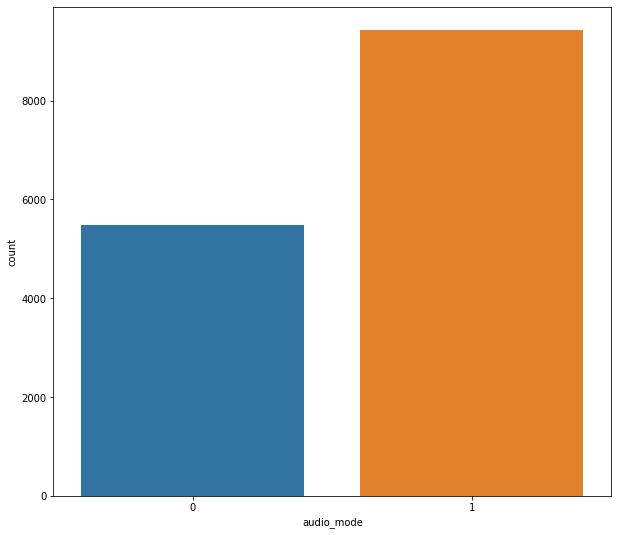

In [69]:
plt.figure(figsize=(10,9))
sns.countplot(df['audio_mode'])
plt.show()

Podemos ver aqui que a maior parte das músicas analisadas estão em tom maior.

### key

key é uma feature que acredito ser melhor tratada como categórica, já que trata de uma nota musical, o que é finitio e bem deinido.

In [70]:
df['key'].unique()

array([ 8.   ,  3.   ,  0.   , 10.   ,  4.   ,  2.   ,  1.   ,  9.   ,
        7.   , 11.   ,  5.   ,  6.   ,  0.177])

In [71]:
toms = {0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
df.replace(0.177,np.NaN, inplace=True)
df.replace({'key':toms}, inplace=True)
df['key'].describe()

count     14921
unique       12
top           C
freq       1732
Name: key, dtype: object

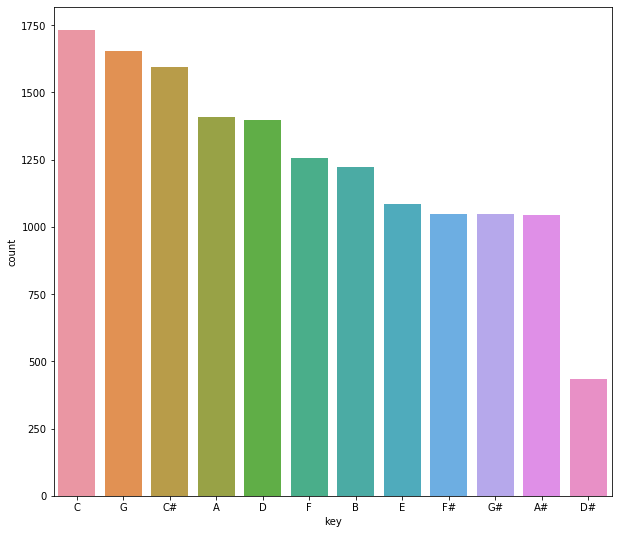

In [72]:
plt.figure(figsize=(10,9))
sns.countplot(df['key'], order=df['key'].value_counts().index)
plt.show()

Podemos ver pelo gráfico que as notas estão relativamente bem distribuidas, sendo a exceção apenas o "D#". Com os toms mais usados sendo o "C", "G" e "C#". 

## Assinaturas de Tempo

In [73]:
df['time_signature'].describe()

count     14922
unique        5
top           4
freq      13973
Name: time_signature, dtype: object

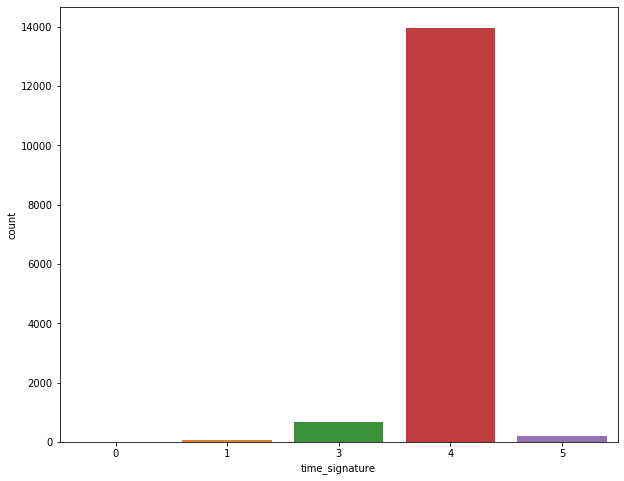

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(df['time_signature'])
plt.show()

Aqui fica claro como a assinatura de tempo 4 é de longe a mais comum.

## Há Relação entre as features categóricas?

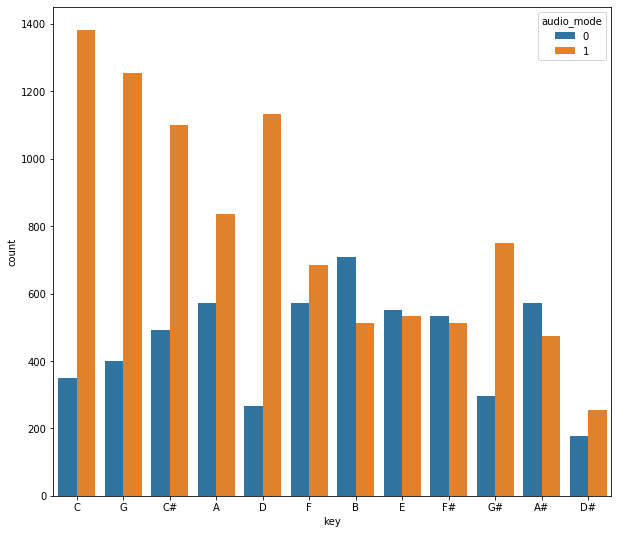

In [75]:
plt.figure(figsize=(10,9))
sns.countplot(x='key', data=df, hue='audio_mode', order=df['key'].value_counts().index)
plt.show()

Podemos ver aqui que existem algumas notas que MANTÊM a relação de maior-menor, sendo elas A, F e D#. Outras possuem muito MAIS músicas em um tom MAIOR: C, G, C#, D e G#. E por último aquelas que possuem MAIS músicas com tom MENOR: B, E, F#, A#.

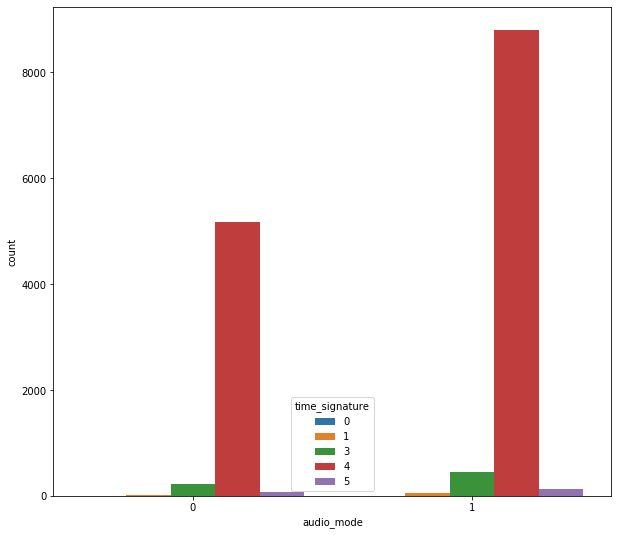

In [76]:
plt.figure(figsize=(10,9))
sns.countplot(x='audio_mode', data=df, hue='time_signature')
plt.show()

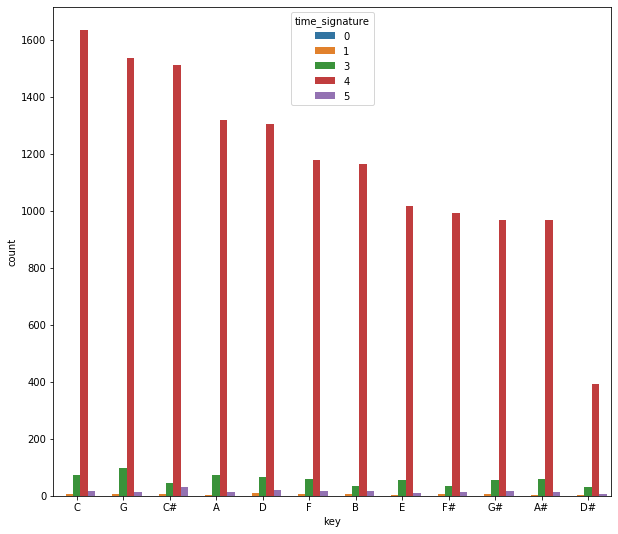

In [77]:
plt.figure(figsize=(10,9))
sns.countplot(x='key', data=df, hue='time_signature', order=df['key'].value_counts().index)
plt.show()

Aqui podemos confirmar que a Assinatura de tempo continua na mesma proporção para todos os outros valores categóricos.

# Dados Numéricos

In [78]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
count,14921.000000,1.492100e+04,14907.000000,14922.000000,14917.000000,14919.000000,14891.000000,14921.000000,14904.000000,14921.000000,14910.000000
mean,48.745727,-1.241582e+09,0.270533,0.624505,0.639857,0.092767,0.179829,-7.677507,0.105868,121.098447,0.527240
std,20.380255,1.516879e+11,0.298244,0.158107,0.221734,0.253810,0.161941,4.019532,0.803877,29.063003,0.247683
min,0.000000,-1.852891e+13,0.000001,0.000000,0.000000,0.000000,-8.575000,-38.768000,0.000000,0.000000,0.000000
25%,37.000000,1.839380e+05,0.023600,0.524000,0.496000,0.000000,0.093000,-9.390000,0.037200,98.121000,0.333000
50%,52.000000,2.118510e+05,0.139000,0.636000,0.672000,0.000021,0.121000,-6.751000,0.054100,120.016000,0.527000
75%,63.000000,2.447260e+05,0.459000,0.740000,0.818000,0.005100,0.224000,-4.991000,0.112000,139.941000,0.728000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,10.000000,0.986000,1.585000,97.420000,242.318000,0.984000


Aqui podemos ver que há um dado negativo em ```'song_duration_ms'``` . O que com certeza é um dado errado, já que se trata de uma medida de tempo. O valor máximo parece correto, mesmo que seja bem grande (cerca de 30 min, bem, algumas pessoas realmente devem gostar de prog experimental...)

Além disso, em ```'loudness'``` há um valor maior que 0, o o que também está errado.

### Duração das Músicas

In [79]:
df = df[df['song_duration_ms'] > 0]
df['song_duration_ms'].describe()

count    1.492000e+04
mean     2.189682e+05
std      6.233789e+04
min      1.200000e+04
25%      1.839545e+05
50%      2.118510e+05
75%      2.447345e+05
max      1.799346e+06
Name: song_duration_ms, dtype: float64

Agora tudo parece correto. Além disso, vou criar uma coluna que coloque estes valores em minutos, para facilitar a leitura:

In [80]:
df['song_duration_min'] = df['song_duration_ms'] / 60000
df['song_duration_min'].describe()

count    14920.000000
mean         3.649470
std          1.038965
min          0.200000
25%          3.065908
50%          3.530850
75%          4.078908
max         29.989100
Name: song_duration_min, dtype: float64

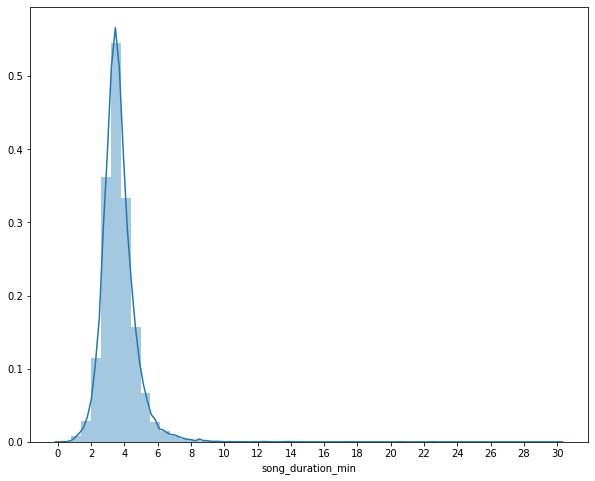

In [81]:
plt.figure(figsize=(10,8))
sns.distplot(df['song_duration_min'].dropna(), bins=50)
plt.xticks(np.arange(0, 32, 2))
plt.show()

Aqui é perceptível como as músicas estão bem concentradas nas marcas de 2 à 5 minutos, com uma média de 3min e 40s. Com poucas passando dos 6 minutos. Porém ainda acho importante manter esses outliers na análise.

### Loudness

In [82]:
df = df[df['loudness'] <= 0]
df['loudness'].describe()

count    14912.000000
mean        -7.681991
std          4.016156
min        -38.768000
25%         -9.392250
50%         -6.752500
75%         -4.994000
max         -0.257000
Name: loudness, dtype: float64

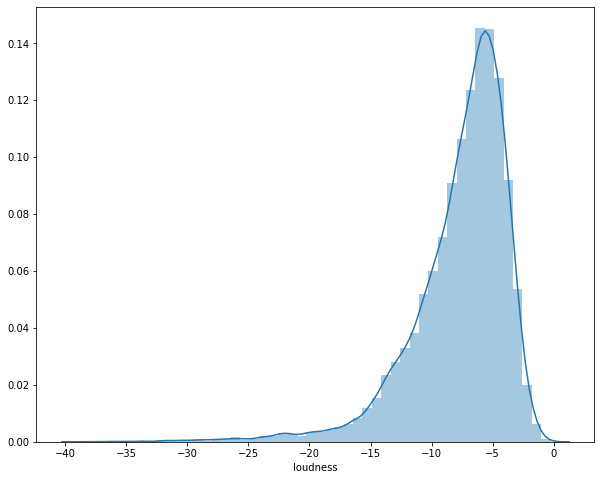

In [83]:
plt.figure(figsize=(10,8))
sns.distplot(df['loudness'].dropna())
plt.xticks(np.arange(-40, 1, 5))
plt.show()

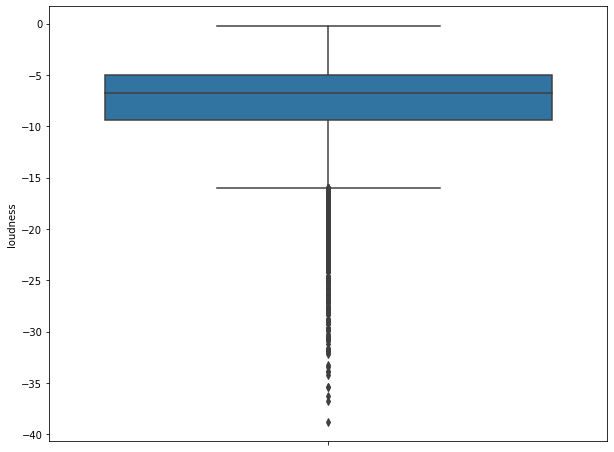

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(df['loudness'].dropna(), orient='v')
plt.show()

Aqui fica claro como os dados estão bem concentrados nos valores de -5dB à -10dB, com os outliers passando da marca de -15dB.

## Popularidade das Músicas

In [85]:
df['song_popularity'].describe()

count    14912.000000
mean        48.746111
std         20.383436
min          0.000000
25%         37.000000
50%         52.000000
75%         64.000000
max        100.000000
Name: song_popularity, dtype: float64

In [86]:
df.nlargest(10,'song_popularity')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
4299,Happier,100.0,214289.0,0.19100,0.687,0.792,0.000000,F,0.1670,-2.749,1,0.0452,100.015,4,0.671,3.571483
1229,I Love It (& Lil Pump),99.0,127946.0,0.01140,0.901,0.522,0.000000,D,0.2590,-8.304,1,0.3300,104.053,4,0.329,2.132433
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98.0,212500.0,0.15300,0.841,0.798,0.000003,C#,0.0618,-4.206,0,0.2290,95.948,4,0.591,3.541667
4302,Eastside (with Halsey & Khalid),98.0,173799.0,0.55500,0.560,0.680,0.000000,F#,0.1160,-7.648,0,0.3210,89.391,4,0.319,2.896650
4329,Promises (with Sam Smith),98.0,213309.0,0.01190,0.781,0.768,0.000005,B,0.3250,-5.991,1,0.0394,123.070,4,0.486,3.555150
7584,In My Feelings,98.0,217925.0,0.05890,0.835,0.626,0.000060,C#,0.3960,-5.833,1,0.1250,91.030,4,0.350,3.632083
1230,Falling Down,97.0,196400.0,0.01750,0.669,0.574,0.002940,E,0.1460,-6.442,0,0.0286,120.013,4,0.273,3.273333
1250,SICKO MODE,97.0,312820.0,0.00513,0.834,0.730,0.000000,G#,0.1240,-3.714,1,0.2220,155.008,4,0.446,5.213667
7576,In My Mind,97.0,184560.0,0.17600,0.694,0.770,0.000011,F#,0.1180,-5.335,1,0.1490,125.905,4,0.163,3.076000
7581,Lucid Dreams,97.0,239835.0,0.34900,0.511,0.566,0.000000,F#,0.3400,-7.230,0,0.2000,83.903,4,0.218,3.997250


Aqui podemos dar uma olhada nas 10 músicas mais populares do dataframe

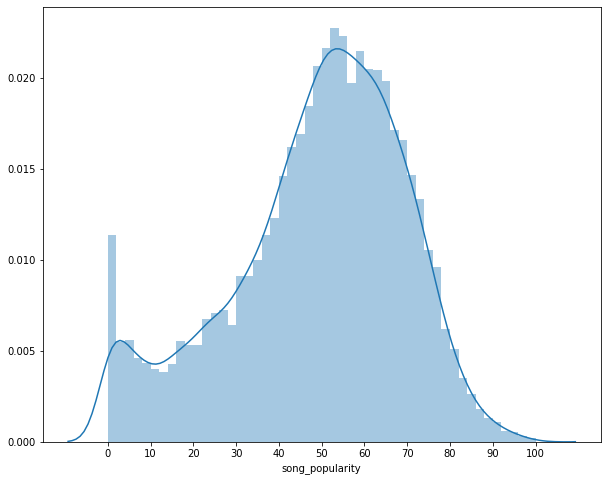

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(df['song_popularity'].dropna(), bins=50)
plt.xticks(np.arange(0,101,10))
plt.show()

Aqui temos um histograma interessante. Podemos dizer que os dados estão relativamente bem distribuídos, porém com uma densidade um pouco maior na esquerda com um número elevado de músicas com valor próximo à 0. Com um pico nos valores do meio.

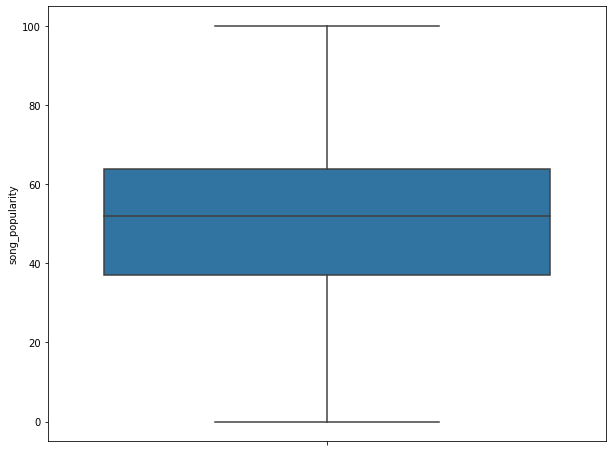

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(df['song_popularity'].dropna(), orient='v')
plt.show()

Nesse boxplot podemos ver melhor que os dados estão concentrados entre 40 e 60. E que o dataset não apresenta outliers nessa feature.

## O Quão Acústica é a Música?

In [89]:
df['acousticness'].describe()

count    14898.000000
mean         0.270673
std          0.298277
min          0.000001
25%          0.023625
50%          0.139000
75%          0.459000
max          0.996000
Name: acousticness, dtype: float64

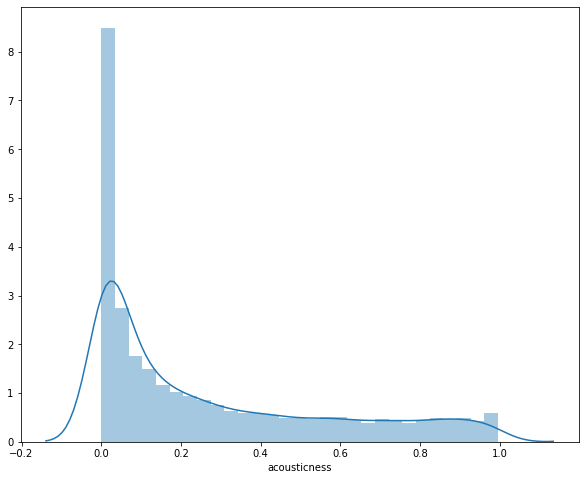

In [90]:
plt.figure(figsize=(10,8))
sns.distplot(df['acousticness'].dropna())
plt.show()

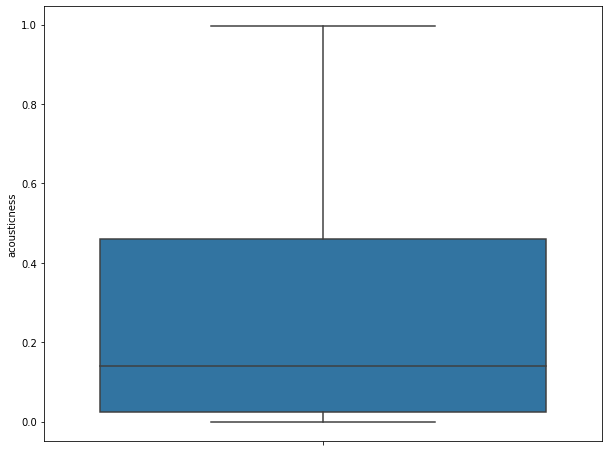

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(df['acousticness'].dropna(), orient='v')
plt.show()

Aqui fica claro como os dados estão concentrados nos valores próximos à 0, sendo bem distribúidos no restante dos valores. Ou seja a maior parte das músicas do dataframe com certeza não são acústicas.

## O Quão Dançável é a Música?

In [92]:
df['danceability'].describe()

count    14912.000000
mean         0.624516
std          0.158070
min          0.000000
25%          0.524000
50%          0.636000
75%          0.740000
max          0.987000
Name: danceability, dtype: float64

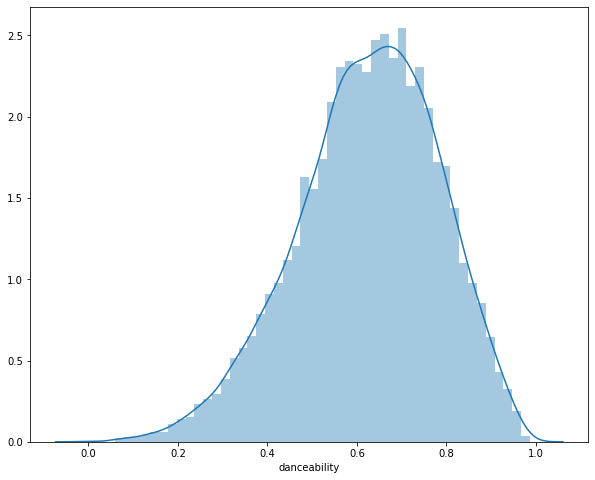

In [93]:
plt.figure(figsize=(10,8))
sns.distplot(df['danceability'])
plt.show()

Aqui o gráfico assemelha-se à distribuição normal, só que deslocado para a direita com uma cauda na esquerda.

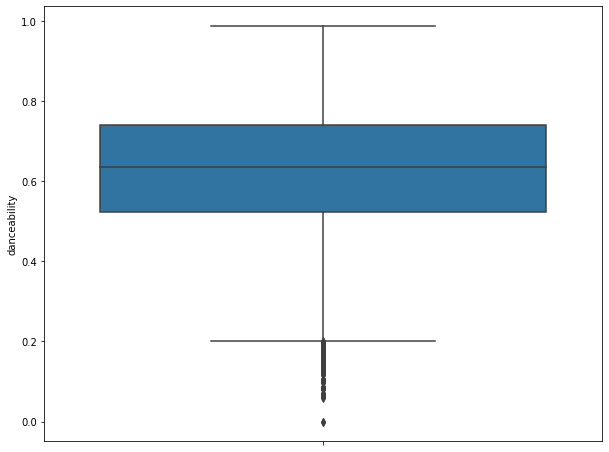

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(df['danceability'], orient='v')
plt.show()

Vemos aqui a concentração dos dados nos valores próximos à 0.5 e 0.7. Com outliers a baixo de 0.2.

## Qual a Itensidade da Música?

In [95]:
df['energy'].describe()

count    14907.000000
mean         0.639741
std          0.221618
min          0.001070
25%          0.496000
50%          0.672000
75%          0.817000
max          0.999000
Name: energy, dtype: float64

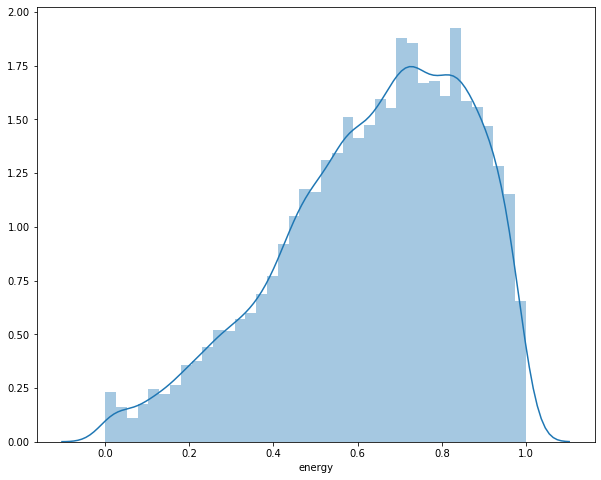

In [96]:
plt.figure(figsize=(10,8))
sns.distplot(df['energy'])
plt.show()

Vemos aqui um gráfico mais concentrado nos valores da direita, com cauda na esquerda.

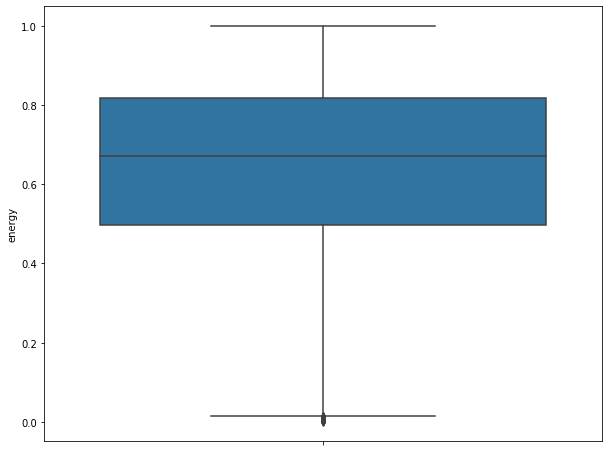

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(df['energy'], orient='v')
plt.show()

Aqui podemos ver melhor que os valores estão concentrados entre os valores de 0.5 e 0.8, com os outliers sendo valores próximos à 0

## O Quão Instrumental é a Música?

In [98]:
df['instrumentalness'].describe()

count    14909.000000
mean         0.092018
std          0.240405
min          0.000000
25%          0.000000
50%          0.000021
75%          0.005050
max          0.997000
Name: instrumentalness, dtype: float64

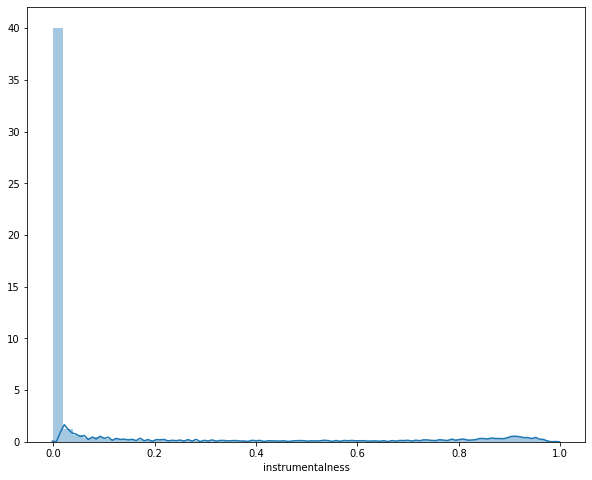

In [99]:
plt.figure(figsize=(10,8))
sns.distplot(df['instrumentalness'])
plt.show()

Aqui podemos ver claramente que os dados estão bem concentrados no 0. Ou seja, quase todas as músicas tem uma alta chance de terem vocais.

## Há Plateia na Gravação?

In [100]:
df['liveness'].describe()

count    14881.000000
mean         0.180367
std          0.145121
min          0.010900
25%          0.093000
50%          0.121000
75%          0.224000
max          0.986000
Name: liveness, dtype: float64

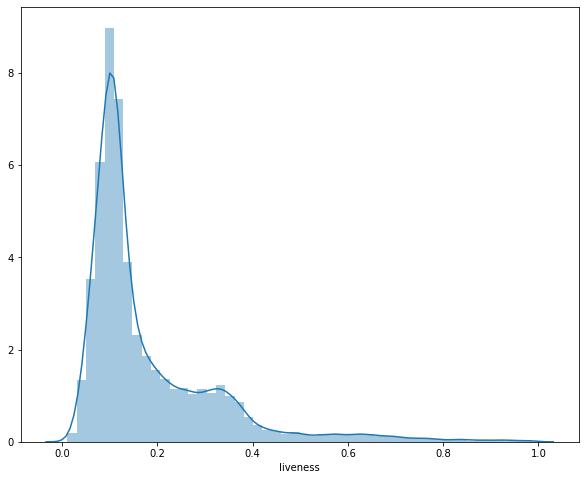

In [101]:
plt.figure(figsize=(10,8))
sns.distplot(df['liveness'])
plt.show()

Podemos ver dados bem concentrados na esquerda, especialmente nos menores valores, com cauda na direita.

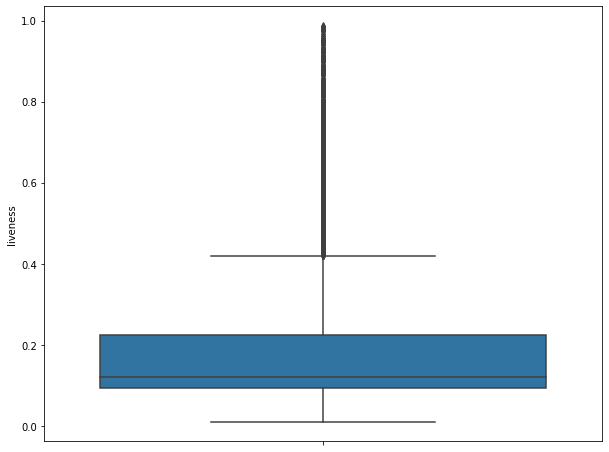

In [102]:
plt.figure(figsize=(10,8))
sns.boxplot(df['liveness'], orient='v')
plt.show()

Aqui podemos ver como os dados estão bem concentrados no menores valores, especialmente os próximos à 0.1. Com outliers depois de 0.4. Ou seja, na grande maioria das músicas há uma alta probabilidade de não haver plateia.

## O Quão "Falada" é a Música?

In [106]:
df['speechiness'].describe()

count    14894.000000
mean         0.099283
std          0.103512
min          0.000000
25%          0.037200
50%          0.054050
75%          0.112000
max          0.941000
Name: speechiness, dtype: float64

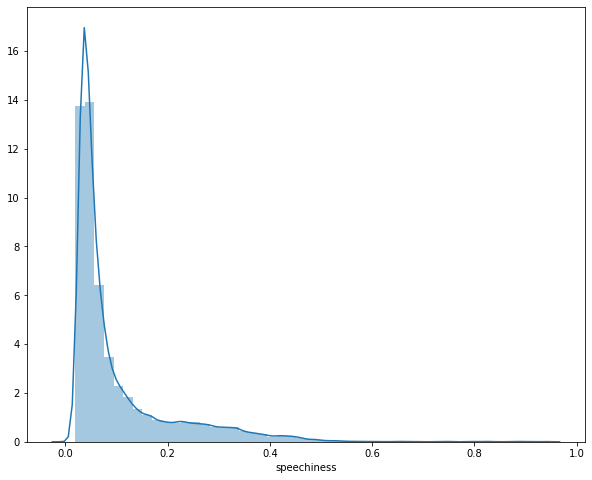

In [107]:
plt.figure(figsize=(10,8))
sns.distplot(df['speechiness'])
plt.show()

Aqui podemos ver que os valores estão claramente concentrados na esquerda, especialmente nos valores próximos de 0 e 0.1. Ou seja, a maior parte das músicas tem uma grande chance de não serem só faladas.

## Tempo

In [108]:
df['tempo'].describe()

count    14911.000000
mean       121.098729
std         29.053528
min          0.000000
25%         98.108500
50%        120.014000
75%        139.941500
max        242.318000
Name: tempo, dtype: float64

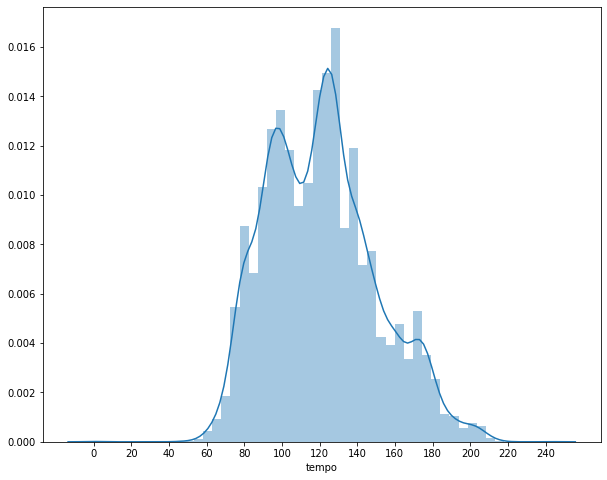

In [109]:
plt.figure(figsize=(10,8))
sns.distplot(df['tempo'])
plt.xticks(np.arange(0,251,20))
plt.show()

Este é um histograma interessante. Podemos ver que ele é relativamente bem distribuído, com valores mais concentrados no meio, porém possuí alguns "picos" fora dessa concentração. Minha hipótese é a de que isso tem relação com a assinatura de tempo das músicas e como elas se alinham com o metrônomo. Então tempos que são múltiplos dessa assinatura devem ser mais populares. Sendo que 120BPM é a mais fácil de se alinhar, portanto a mais usada.

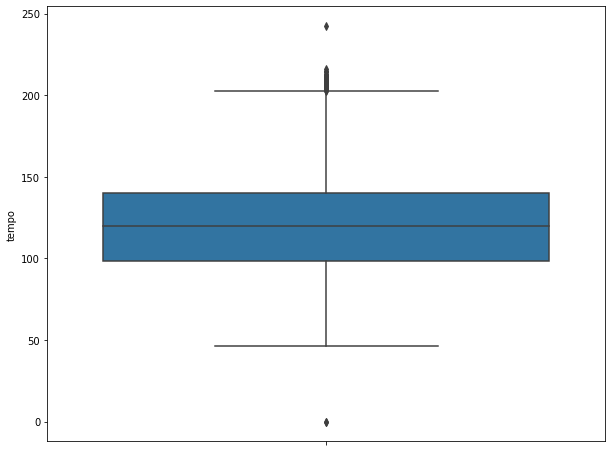

In [110]:
plt.figure(figsize=(10,8))
sns.boxplot(df['tempo'], orient='v')
plt.show()

Aqui vemos como os dados estão concentrados entre 100BPM e 140BPM, com outliers antes de 50BMP e depois de 200BPM

## O Quão Positiva é uma Música?

In [111]:
df['audio_valence'].describe()

count    14901.000000
mean         0.527199
std          0.247661
min          0.000000
25%          0.333000
50%          0.527000
75%          0.728000
max          0.984000
Name: audio_valence, dtype: float64

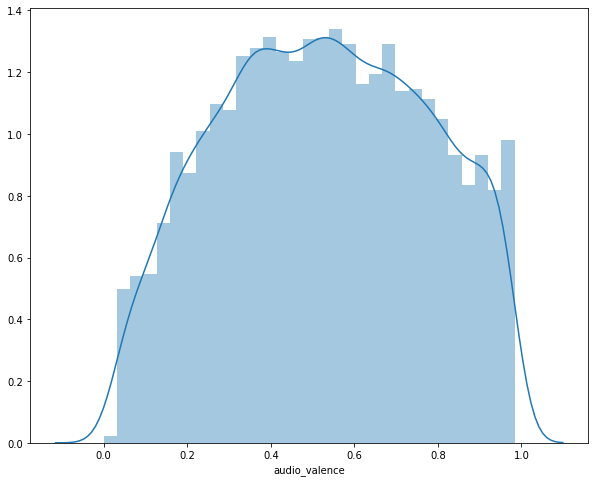

In [112]:
plt.figure(figsize=(10,8))
sns.distplot(df['audio_valence'])
plt.show()

Aqui vemos um histograma bem distribuido, com uma concentração um pouco maior nos valores do meio. 

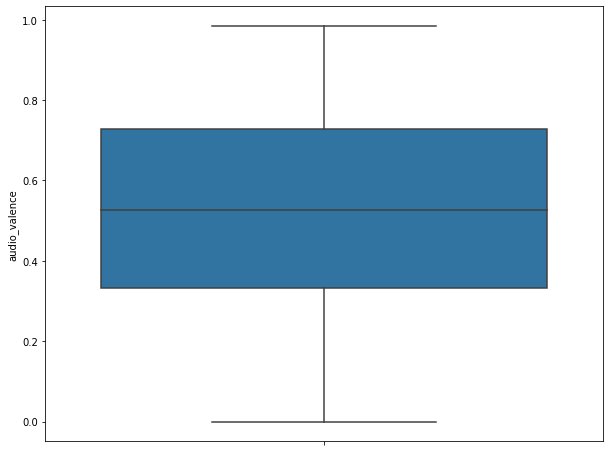

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(df['audio_valence'], orient='v')
plt.show()

Aqui fica clara a natureza bem distribuida dos dados, com uma maior concentração próxima dos valores de 0.3 e 0.7.

# Há relação entre as features numéricos?

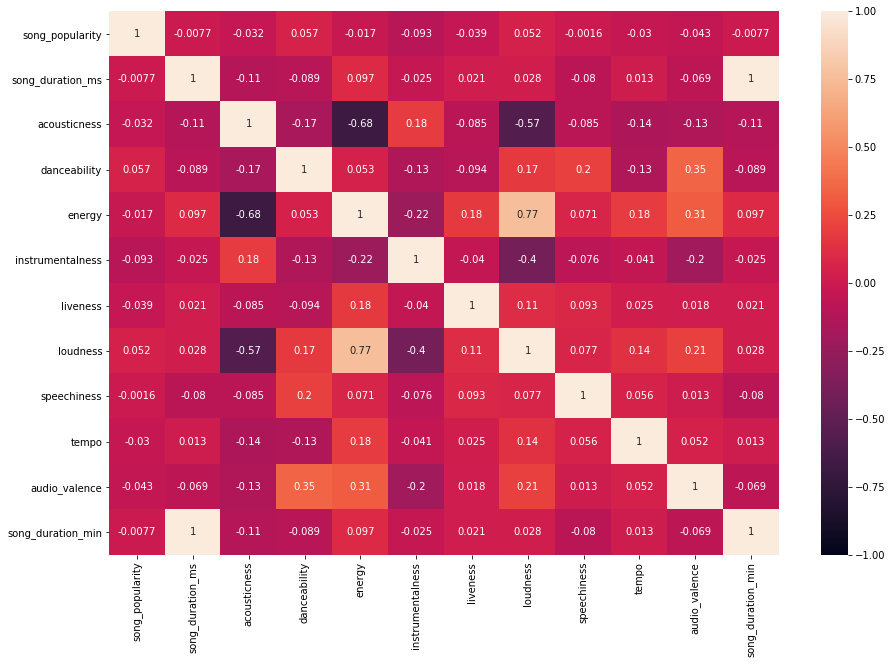

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Podemos ver que há correlação positiva entre as features de ```'loudness'``` e ```'energy'```. Com uma correlação negativa entre as features de ```'energy'``` e ```'acousticness'``` e das features ```'loudness'``` e ```'acousticness'```, há também uma leve correlação negativa entre as features ```'loudness'``` e ```'instrumentalness'```.

Vamos plotar algumas dessas relações:

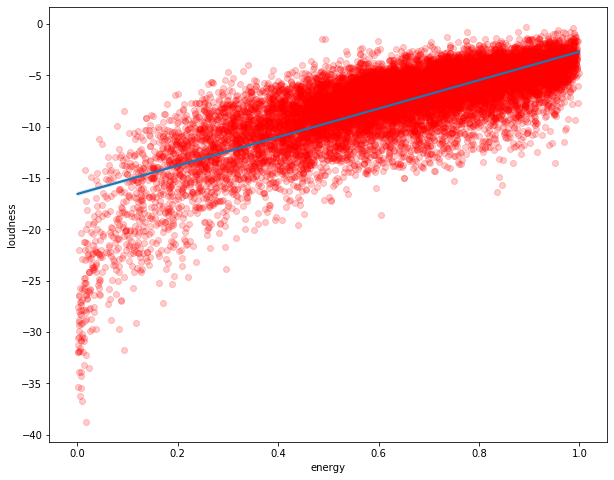

In [115]:
plt.figure(figsize=(10, 8))
sns.regplot(x='energy', y='loudness', data=df,scatter_kws={'alpha':0.2,'color':'red'})
plt.show()

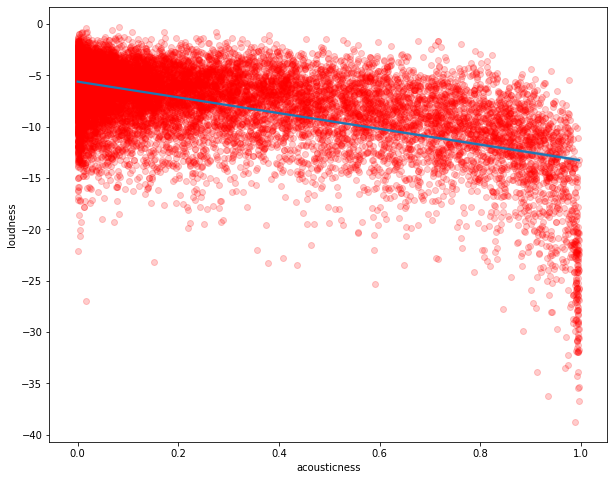

In [116]:
plt.figure(figsize=(10, 8))
sns.regplot(x='acousticness', y='loudness', data=df,scatter_kws={'alpha':0.2,'color':'red'})
plt.show()

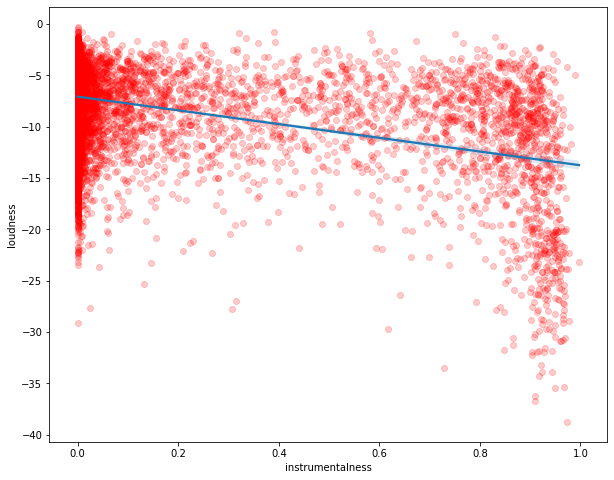

In [117]:
plt.figure(figsize=(10, 8))
sns.regplot(x='instrumentalness', y='loudness', data=df,scatter_kws={'alpha':0.2,'color':'red'})
plt.show()

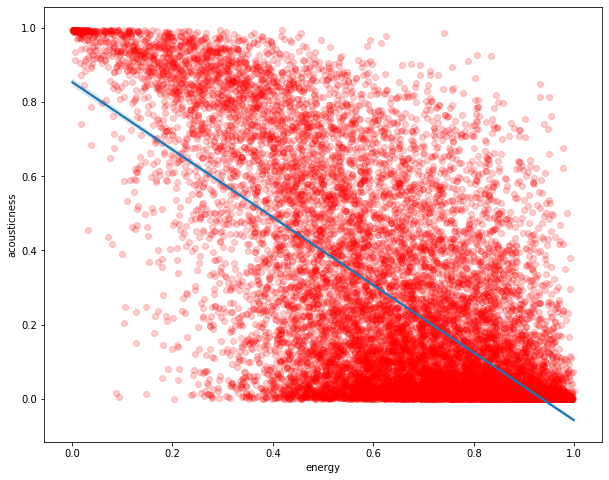

In [118]:
plt.figure(figsize=(10, 8))
sns.regplot(x='energy', y='acousticness', data=df,scatter_kws={'alpha':0.2,'color':'red'})
plt.show()

Vendo essas correlações podemos perceber um pouco como o coeficiente de energy é calculado, sendo loudness um fator importante. Pelo fator de acousticness estar também relacionado com loudness, acousticness também acaba se relacionando com energy.
Podemos notar também que instrulmentalness possúi uma correlação menor com energy.

# Relações entre Features Categóticas e Numéricas

<Figure size 720x576 with 0 Axes>

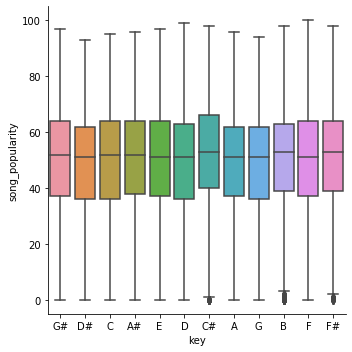

In [119]:
plt.figure(figsize=(10,8))
sns.catplot(x='key', y='song_popularity', data=df, kind='box')
plt.show()

<Figure size 720x576 with 0 Axes>

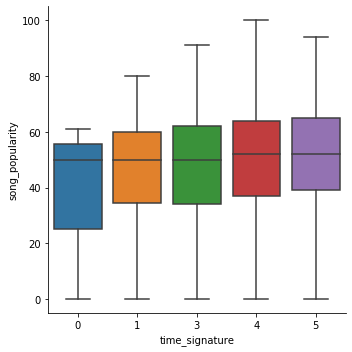

In [120]:
plt.figure(figsize=(10,8))
sns.catplot(x='time_signature', y='song_popularity', data=df, kind='box')
plt.show()

<Figure size 720x576 with 0 Axes>

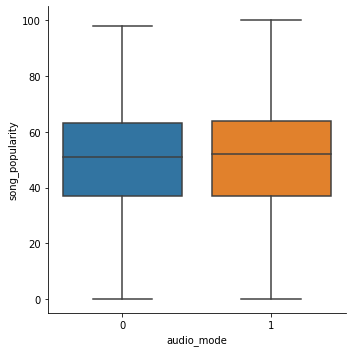

In [121]:
plt.figure(figsize=(10,8))
sns.catplot(x='audio_mode', y='song_popularity', data=df, kind='box')
plt.show()

Com esses gráficos podemo ver como song_popularity não tem nenhuma relação clara com os dados categóricos, assim, nenhum outro dado (nem numérico nem categórico) mostra uma relação forte com essa feature.

<Figure size 720x576 with 0 Axes>

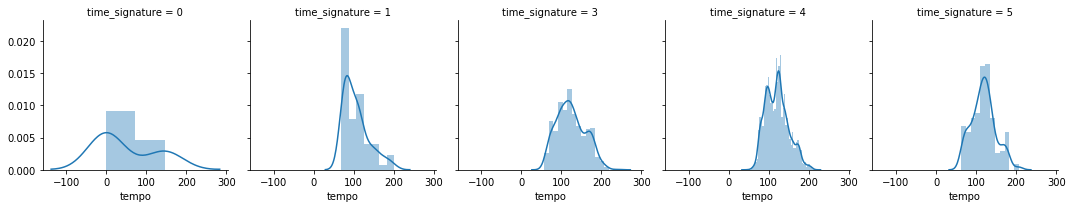

In [122]:
plt.figure(figsize=(10,8))
g = sns.FacetGrid(df, col='time_signature')
g.map(sns.distplot, 'tempo')
plt.show()

Esse Facet Grid mostra mostra como há uma concentração diferente nos tempos dependendo da time_signature da música.

# Conclusões finais

Depois de analisar esse dataset um tanto quanto bagunçado, podemos tirar algumas conclusões:

A música média está no **tom** Dó **maior**, com uma **assinaura de tempo** de 4, com **duração** de 3 minutos e meio. Possui um **volume médio** de -6,75dB com 52 **pontos de popularidade**. Ela **provavelmente não é acústica**, **possui voz**, **não possui plateia**, e provavelmente também **não é falda**. Possui uma pontução de **dançável** de 0.63, uma de **intensidade** de 0.67 e uma de **positividade**. Seu **tempo** é de 120BPM.

Nas features catégoticas podemos ver que exite correlação entre **nota geral** e **tom geral** da música. Isso provavelmente acontece pois algumas notas são mais fáceis de construir uma melodia agradável em tons específicos.

Nas numéricas existe uma correlação positiva entre **volume geral** e **intensidade geral** das músicas. E correlações negativas entre **intensidade geral** e **volume geral** com **chance de ser acústica**, com uma correlação negativa menor entre **volume geral** e **chance de ser intrumental**.